**Objective**: Learn how to inspect, clean, and prepare real-world psychological data for visualization and analysis.

1. Import Libraries and Load the Dataset

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("stroop_raw.csv")

# Preview first few rows
data.head()


,Participant_ID,Gender,Age,Congruent_RT,Incongruent_RT,Errors
0,1,Male,33.0,620.37,726.98,0.0
1,2,Female,30.0,605.38,NaN,4.0
2,3,Male,35.0,645.96,650.29,2.0
3,4,NaN,32.0,571.09,792.97,5.0
4,5,Male,30.0,NaN,677.12,2.0


2. Inspect Data Structure



*   Check datatypes.



In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Participant_ID  120 non-null    int64  
 1   Gender          114 non-null    object 
 2   Age             114 non-null    float64
 3   Congruent_RT    114 non-null    float64
 4   Incongruent_RT  114 non-null    float64
 5   Errors          114 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.8+ KB




*   Check descriptive statistics.



In [83]:
print('Descriptive statistics')
print(data.describe())

Descriptive statistics
       Participant_ID         Age  Congruent_RT  Incongruent_RT      Errors
count      120.000000  114.000000    114.000000      114.000000  114.000000
mean        60.500000   25.403509    618.502632      749.828070    1.368421
std         34.785054    5.220313     78.036450      221.786319    1.312049
min          1.000000   18.000000    100.000000      615.950000    0.000000
25%         30.750000   21.000000    598.827500      688.652500    0.000000
50%         60.500000   25.000000    626.215000      713.595000    1.000000
75%         90.250000   30.000000    655.087500      751.652500    2.000000
max        120.000000   35.000000    729.380000     2500.000000    8.000000


count: The number of non-null observations.
mean: The arithmetic mean of the values.
std: The standard deviation, a measure of the dispersion of the data.
min: The minimum value.
25%: The 25th percentile (first quartile).
50%: The 50th percentile (median).
75%: The 75th percentile (third quartile).
max: The maximum value.

*   Check missing values exist.



In [84]:
# Check missing values
print('Check missing values')
data.isna().sum()

Check missing values


,0
Participant_ID,0
Gender,6
Age,6
Congruent_RT,6
Incongruent_RT,6
Errors,6


3. Handling Missing Values

In [85]:
# Option 1: Drop rows with missing values (quick)
data_drop = data.dropna()

# Option 2: Impute
# data["Age"].fillna(data["Age"].median(), inplace=True)
# data["Congruent_RT"].fillna(data["Congruent_RT"].mean(), inplace=True)
# data["Incongruent_RT"].fillna(data["Incongruent_RT"].mean(), inplace=True)
# data["Errors"].fillna(data["Errors"].median(), inplace=True)
# data["Gender"].fillna("Unknown", inplace=True)

data_org=data
data=data_drop

# Recheck
data.isna().sum()

,0
Participant_ID,0
Gender,0
Age,0
Congruent_RT,0
Incongruent_RT,0
Errors,0


4. Fixing Inconsistent Categories

In [71]:
print(data["Gender"].value_counts())

Gender
Female     49
Male       41
FEMALE      1
unknown     1
male        1
Name: count, dtype: int64


In [72]:
# Standardize case
print('Standardize case')
data["Gender"] = data["Gender"].str.title()
print(data["Gender"].value_counts())

Standardize case
Gender
Female     50
Male       42
Unknown     1
Name: count, dtype: int64


In [73]:
# Replace "Unknown" or invalid values with np.nan or "Other"
data["Gender"] = data["Gender"].replace({"Unknown": "Other"})

print(data["Gender"].value_counts())

Gender
Female    50
Male      42
Other      1
Name: count, dtype: int64


5. Identifying Outliers

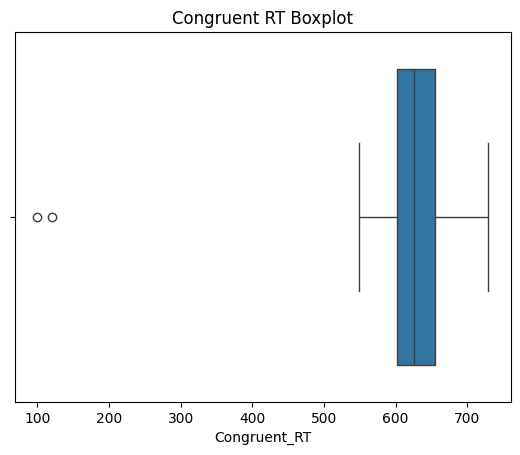

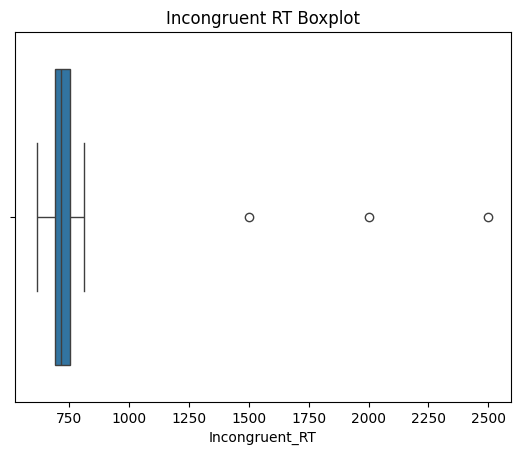

,Congruent_RT,Incongruent_RT
count,93.000000,93.000000
mean,617.986129,757.019462
std,84.389550,243.740122
min,100.000000,615.950000
25%,601.900000,689.900000
50%,625.830000,713.130000
75%,654.880000,750.940000
max,729.380000,2500.000000


In [74]:
sns.boxplot(x=data["Congruent_RT"])
plt.title("Congruent RT Boxplot")
plt.show()

sns.boxplot(x=data["Incongruent_RT"])
plt.title("Incongruent RT Boxplot")
plt.show()

# Check high and low extremes
data[["Congruent_RT", "Incongruent_RT"]].describe()

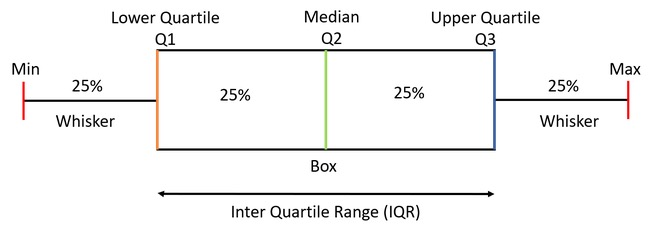

6. Handling Outliers

In [75]:
# Option 1: Remove outliers
cleaned = data[(data["Congruent_RT"] > 200) & (data["Incongruent_RT"] < 1200)]

# Option 2: Winsorize extreme values
# data["Congruent_RT"] = np.where(data["Congruent_RT"] < 200, 200, data["Congruent_RT"])
# data["Incongruent_RT"] = np.where(data["Incongruent_RT"] > 1200, 1200, data["Incongruent_RT"])

data_uncleaned = data
data = cleaned

cleaned.describe()

,Participant_ID,Age,Congruent_RT,Incongruent_RT,Errors
count,88.000000,88.000000,88.000000,88.000000,88.000000
mean,61.784091,25.500000,627.700682,714.702273,1.329545
std,34.329187,5.317505,36.547312,44.279361,1.328049
min,1.000000,18.000000,548.460000,615.950000,0.000000
25%,32.750000,21.000000,602.140000,689.087500,0.000000
50%,61.000000,24.000000,626.215000,712.540000,1.000000
75%,90.250000,30.000000,654.145000,749.307500,2.000000
max,120.000000,35.000000,721.570000,812.410000,8.000000


7. Create Derived Variables

In [76]:
data["Interference"] = data["Incongruent_RT"] - data["Congruent_RT"]
data.head()

/tmp/ipython-input-486718725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Interference"] = data["Incongruent_RT"] - data["Congruent_RT"]


,Participant_ID,Gender,Age,Congruent_RT,Incongruent_RT,Errors,Interference
0,1,Male,33.0,620.37,726.98,0.0,106.61
2,3,Male,35.0,645.96,650.29,2.0,4.33
5,6,Female,26.0,583.41,652.40,0.0,68.99
6,7,Male,32.0,644.82,699.32,3.0,54.50
8,9,Male,18.0,604.47,709.13,3.0,104.66


8. Verify Final Cleaned Data

In [77]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 0 to 119
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Participant_ID  88 non-null     int64  
 1   Gender          88 non-null     object 
 2   Age             88 non-null     float64
 3   Congruent_RT    88 non-null     float64
 4   Incongruent_RT  88 non-null     float64
 5   Errors          88 non-null     float64
 6   Interference    88 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 5.5+ KB


9. Save the Clean Dataset

In [78]:
data.to_csv("stroop_clean.csv", index=False)
print(" Clean dataset saved as stroop_clean.csv")

 Clean dataset saved as stroop_clean.csv
